<a href="https://colab.research.google.com/github/mrchapagain/iCare/blob/main/ConcitoDataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Climate Data-Base from CONCITO

**## Exploratery Analysis (EDA)**

In [ ]:
import pandas as pd
# Import data
data_link= "/content/ClimateData.xlsx"

In [ ]:
# Lets read the filke as it is
col_names= ["id", "Product_dk", "Category_dk", "Product_en", "Category_en", "Unit", "Agriculture", "iLUC", "Processing", "Packaging", "Transport", "Retail", "Total_CO2_eq/kg", "Energy_KJ", "Fat_g", "Carb_g", "Protein_g", "Data_Source", "Comments", "GPC_Level4_en", "ID_Food", "ID_Pack", "ID_Retail", "GPC_Category_en", "GPC_Category_dk", "GPC_Level4_dk", "product_type", "GPC_level1", "Food_group", "GPC_level2", "Un/Processed", "GPC_Level3", "Extra_category"]

data= pd.read_excel(data_link, sheet_name=1, index_col=False, header=None, skiprows=1, names= col_names).round(decimals = 2)
data.head(3)

/usr/local/lib/python3.7/dist-packages/pandas/io/excel/_base.py:1292: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  **kwds,


,id,Product_dk,Category_dk,Product_en,Category_en,Unit,Agriculture,iLUC,Processing,Packaging,...,GPC_Category_en,GPC_Category_dk,GPC_Level4_dk,product_type,GPC_level1,Food_group,GPC_level2,Un/Processed,GPC_Level3,Extra_category
0,Ra00001,"Peberfrugt, rød, rå",Grøntsager,"Pepper, sweet, red, raw",Vegetables,kg,0.25,0.03,0.0,0.14,...,Vegetables,Grøntsager,10006191,Square Tapering Sweet Peppers (Peg Top),50000000.0,Food/Beverage/Tobacco,50260000.0,Vegetables (Non Leaf) – Unprepared/Unprocessed...,50260400.0,Peppers
1,Ra00002,"Tomat, uspec., rå",Grøntsager,"Tomato, ripe, raw, origin unknown",Vegetables,kg,0.07,0.01,0.0,0.14,...,Vegetables,Grøntsager,10006165,Tomatoes – Round,50000000.0,Food/Beverage/Tobacco,50260000.0,Vegetables (Non Leaf) – Unprepared/Unprocessed...,50260300.0,Tomatoes
2,Ra00003,"Squash, rå",Grøntsager,"Squash, raw",Vegetables,kg,0.14,0.04,0.0,0.06,...,Vegetables,Grøntsager,10006355,Squash (Calabaza),50000000.0,Food/Beverage/Tobacco,50260000.0,Vegetables (Non Leaf) – Unprepared/Unprocessed...,50260700.0,Cucurbits – Edible Peel


In [ ]:
data["GPC_Level3"].unique()

array([50260400., 50260300., 50260700., 50260500., 50102100., 50260900.,
       50260600., 50240200., 50202200., 50182100., 50181900., 50221200.,
       50131900., 50182000., 50240100., 50201700., 50202400., 50171800.,
             nan, 50132100., 50202300., 50131800., 50121900., 50221000.,
       50132500., 50121500., 50171900., 50102000., 50161800., 50261300.,
       50260200., 50101800., 50192400., 50192300., 50171700., 50171500.,
       50261600., 50261100., 50350500., 50350200., 50350300., 50290100.,
       50261400., 50261500., 50262200., 50121700., 50261700., 50131700.,
       50193800., 50191500., 50182200., 50161500., 50192900., 50250800.,
       50250600., 50192500., 50260100., 94022500., 50122100., 50192100.,
       50251000., 50250900., 50330100., 50251400., 50181700., 50250700.,
       50260800., 50251100., 50251900., 50251200., 50132000., 50151500.,
       50193100., 93011200., 50193500., 50193400., 50193600., 50193300.,
       50151600., 50193200.])

In [ ]:
# How big is the dataset (no of Rows, no of Columns)
data.shape

(500, 33)

In [ ]:
"""# Have a look the Data Source and Comments part to explore how the data were outsourced)
rep= "Data are obtained as products on the Danish crop market, where supplying countries are identified based on trade statistics"


for row, col in data[["Category_en", 'Product_en', "Data_Source", "Comments"]].iterrows():
  category= col["Category_en"] 
  product= col['Product_en']
  source= col["Data_Source"]
  comment_list= col['Comments'].split(".")[1:-4]
  comment= ",".join(comment_list)
  print(f"Product: {product} (Category of product: {category})")
  print("Comment about data acquisition:", comment)
  print("Data Source:", source)
  print("---------------------------------------------------------------")
"""

'# Have a look the Data Source and Comments part to explore how the data were outsourced)\nrep= "Data are obtained as products on the Danish crop market, where supplying countries are identified based on trade statistics"\n\n\nfor row, col in data[["Category_en", \'Product_en\', "Data_Source", "Comments"]].iterrows():\n  category= col["Category_en"] \n  product= col[\'Product_en\']\n  source= col["Data_Source"]\n  comment_list= col[\'Comments\'].split(".")[1:-4]\n  comment= ",".join(comment_list)\n  print(f"Product: {product} (Category of product: {category})")\n  print("Comment about data acquisition:", comment)\n  print("Data Source:", source)\n  print("---------------------------------------------------------------")\n'

***Let´s have a look dataset with only selected columns that make sense***

In [ ]:
# cols_to_use= ["Product_en", "Category_en", "Unit", "Agriculture", "iLUC", "Processing", "Packaging", "Transport", "Retail", "Total_CO2_eq/kg", "Energy_KJ", "Fat_g", "Carbohydrate_g", "Protein_g", "ID_Food", "ID_Pack", "ID_Retail", "product_type", "GPC_level1", "GPC_level2", "GPC_Level3"]
# cols_to_use= ["Product_en", "Category_en", "Agriculture", "iLUC", "Processing", "Packaging", "Transport", "Retail", "Total_CO2_eq/kg", "Energy_KJ", "Fat_g", "Carb_g", "Protein_g"]
cols_to_use= ["Product_en", "Category_en", "Agriculture", "iLUC", "Processing", "Packaging", "Transport", "Retail", "Total_CO2_eq/kg", "Energy_KJ", "Fat_g", "Carb_g", "Protein_g"]

selected_data= data.loc[:, cols_to_use].round(decimals = 2)
selected_data.head()


,Product_en,Category_en,Agriculture,iLUC,Processing,Packaging,Transport,Retail,Total_CO2_eq/kg,Energy_KJ,Fat_g,Carb_g,Protein_g
0,"Pepper, sweet, red, raw",Vegetables,0.25,0.03,0.0,0.14,0.58,0.01,1.02,133.0,0.1,5.2,0.9
1,"Tomato, ripe, raw, origin unknown",Vegetables,0.07,0.01,0.0,0.14,0.48,0.01,0.70,87.0,0.1,3.2,0.8
2,"Squash, raw",Vegetables,0.14,0.04,0.0,0.06,0.58,0.01,0.83,81.0,0.2,2.4,1.4
3,"Aubergine, raw",Vegetables,0.16,0.02,0.0,0.14,0.65,0.01,0.97,83.0,0.1,3.1,0.9
4,"Tomato, dried",Vegetables,0.91,0.09,-0.0,0.26,0.68,0.01,1.95,1187.0,3.0,43.5,14.1


In [ ]:
selected_data.tail(10)

,Product_en,Category_en,Agriculture,iLUC,Processing,Packaging,Transport,Retail,Total_CO2_eq/kg,Energy_KJ,Fat_g,Carb_g,Protein_g
490,Apple juice,Beverages,0.32,0.02,0.61,0.31,0.37,0.01,1.64,183.0,0.5,10,0.5
491,Minced lamb,Meat/poultry,24.01,6.26,-4.22,0.14,0.11,0.00,26.30,639.0,14.0,0,20
492,Burger buns,Bread/bakery products,0.38,0.04,0.16,0.04,0.10,0.01,0.74,1258.0,5.6,53,8.6
493,Blue cheese,Milk/eggs/substitute products,2.67,0.15,-0.37,0.35,0.11,0.00,2.92,1623.0,36.0,0.1,17
494,Goat cheese,Milk/eggs/substitute products,2.67,0.15,-0.37,0.35,0.11,0.00,2.92,1393.0,28.0,1,20
495,"Vegan cheese, grated or sliced",Milk/eggs/substitute products,0.07,0.12,0.39,0.35,0.07,0.01,1.00,1037.0,17.0,22.8,1.3
496,"Samosa, vegetarian frost",Prepared/preserved foods,0.29,0.09,0.40,0.24,0.13,0.03,1.17,791.0,10.2,21.3,3
497,Cold chocolate,Candy/sugar products,1.83,0.34,2.52,0.38,0.11,0.01,5.18,2403.0,40.0,44,8.9
498,"Nutella, nut cream",Candy/sugar products,1.68,0.44,1.32,0.42,0.10,0.01,3.97,2278.0,31.6,57.6,6
499,"Smoothie, strawberry blueberry",Beverages,0.40,0.07,0.10,0.31,1.29,0.00,2.16,183.0,0.0,9.5,0.4


In [ ]:
# Inspect the null values, Data Types of each columns
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_en       500 non-null    object 
 1   Category_en      500 non-null    object 
 2   Agriculture      500 non-null    float64
 3   iLUC             500 non-null    float64
 4   Processing       500 non-null    float64
 5   Packaging        500 non-null    float64
 6   Transport        500 non-null    float64
 7   Retail           500 non-null    float64
 8   Total_CO2_eq/kg  500 non-null    float64
 9   Energy_KJ        500 non-null    float64
 10  Fat_g            500 non-null    float64
 11  Carb_g           500 non-null    object 
 12  Protein_g        500 non-null    object 
dtypes: float64(9), object(4)
memory usage: 50.9+ KB


In [ ]:
"""# Here need to change Carb_g & Protein_g data object data type to float data type
selected_data["Carb_g"]= [float(str(i).replace(",", "")) for i in selected_data.Carb_g]]


#df = df.replace(r'^\s*$', np.nan, regex=True)
#selected_data["Protein_g"]= selected_data.Protein_g.astype(float, errors='coerce')
selected_data.info()"""

'# Here need to change Carb_g & Protein_g data object data type to float data type\nselected_data["Carb_g"]= [float(str(i).replace(",", "")) for i in selected_data.Carb_g]]\n\n\n#df = df.replace(r\'^\\s*$\', np.nan, regex=True)\n#selected_data["Protein_g"]= selected_data.Protein_g.astype(float, errors=\'coerce\')\nselected_data.info()'

In [ ]:
# Lets check the NAN/Missing values of Data as per columns
selected_data.isna().sum()

Product_en         0
Category_en        0
Agriculture        0
iLUC               0
Processing         0
Packaging          0
Transport          0
Retail             0
Total_CO2_eq/kg    0
Energy_KJ          0
Fat_g              0
Carb_g             0
Protein_g          0
dtype: int64

In [ ]:
# Inspect the numbers of "UNIQUE" values of each columns
selected_data.nunique()

Product_en         500
Category_en         13
Agriculture        162
iLUC               129
Processing         190
Packaging           43
Transport           68
Retail               3
Total_CO2_eq/kg    298
Energy_KJ          429
Fat_g              198
Carb_g             241
Protein_g          190
dtype: int64

In [ ]:
# Inspect the numbers of "UNIQUE" values of selected columns
selected_data['Category_en'].value_counts()

Fruit/vegetable products             75
Meat/poultry                         62
Prepared/preserved foods             61
Vegetables                           56
Seafood                              51
Bread/bakery products                34
Beverages                            32
Seasonings/preservatives/extracts    32
Milk/eggs/substitute products        31
Fruits                               27
Cereal/grain/pulse products          22
Candy/sugar products                 13
Oils/fats edible                      4
Name: Category_en, dtype: int64

In [ ]:
# Inspect the list of "UNIQUE" values of selected columns (especially make sense on catagorical data)
selected_data["Category_en"].unique()

array(['Vegetables', 'Meat/poultry', 'Beverages', 'Bread/bakery products',
       'Cereal/grain/pulse products', 'Milk/eggs/substitute products',
       'Seasonings/preservatives/extracts', 'Seafood',
       'Fruit/vegetable products', 'Candy/sugar products',
       'Prepared/preserved foods', 'Fruits', 'Oils/fats edible'],
      dtype=object)

In [ ]:
# Inspect the smallest & largest values in the columns
selected_data[['Product_en', "Total_CO2_eq/kg"]].groupby(by= ['Product_en'], sort=True).mean().nsmallest(5, ["Total_CO2_eq/kg"])


,Total_CO2_eq/kg
Product_en,
"Water, tap, drinking, average values",0.00
"Mussel, raw",0.22
"Water, bottled, carbonated",0.22
"Brussels sprouts, raw",0.25
"Cabbage, Chinese, pak-choi, raw",0.25


In [ ]:
selected_data[['Product_en', "Total_CO2_eq/kg"]].groupby(by= ['Product_en'], sort=True).mean().nlargest(5, ["Total_CO2_eq/kg"])

,Total_CO2_eq/kg
Product_en,
"Beef, fillet, defatted, raw",151.95
"Beef, T-bone steak, raw",80.89
"Veal, medium fat, raw",50.36
"Roastbeef, sliced",45.84
"Beef, rump, raw",45.69


In [ ]:
# Group some of the elements from columns with categorical data
df=selected_data[['Category_en', 'Agriculture', 'iLUC', 'Processing',	'Packaging',	'Transport',	'Retail', 'Total_CO2_eq/kg']].groupby(by= ['Category_en'], sort=True).mean().sort_values(by=['Total_CO2_eq/kg'], ascending=False).round(decimals = 2)
df

,Agriculture,iLUC,Processing,Packaging,Transport,Retail,Total_CO2_eq/kg
Category_en,,,,,,,
Meat/poultry,13.03,2.65,-0.71,0.20,0.21,0.00,15.38
Seafood,0.07,1.03,7.14,0.55,0.19,0.00,8.98
Oils/fats edible,1.56,0.57,0.76,0.48,0.21,0.01,3.59
Candy/sugar products,1.35,0.29,1.29,0.45,0.14,0.01,3.53
Prepared/preserved foods,1.41,0.34,0.62,0.43,0.13,0.01,2.93
Seasonings/preservatives/extracts,0.54,0.26,1.08,0.71,0.21,0.01,2.81
Milk/eggs/substitute products,1.52,0.20,0.72,0.22,0.11,0.00,2.78
Beverages,0.72,0.33,0.25,0.67,0.52,0.01,2.50
Bread/bakery products,0.72,0.18,0.92,0.27,0.13,0.01,2.22


In [ ]:
# Group some of the elements from columns with categorical data
#selected_data[['Category_en', 'Agriculture', 'iLUC', 'Processing',	'Packaging',	'Transport',	'Retail', 'Total_CO2_eq/kg']].groupby(by= ['Category_en'], sort=True, as_index=False).mean().sort_values(by=['Total_CO2_eq/kg'], ascending=False).round(decimals = 2)

***Data Visualization***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

In [ ]:
selected_data.Agriculture

0      0.25
1      0.07
2      0.14
3      0.16
4      0.91
       ... 
495    0.07
496    0.29
497    1.83
498    1.68
499    0.40
Name: Agriculture, Length: 500, dtype: float64

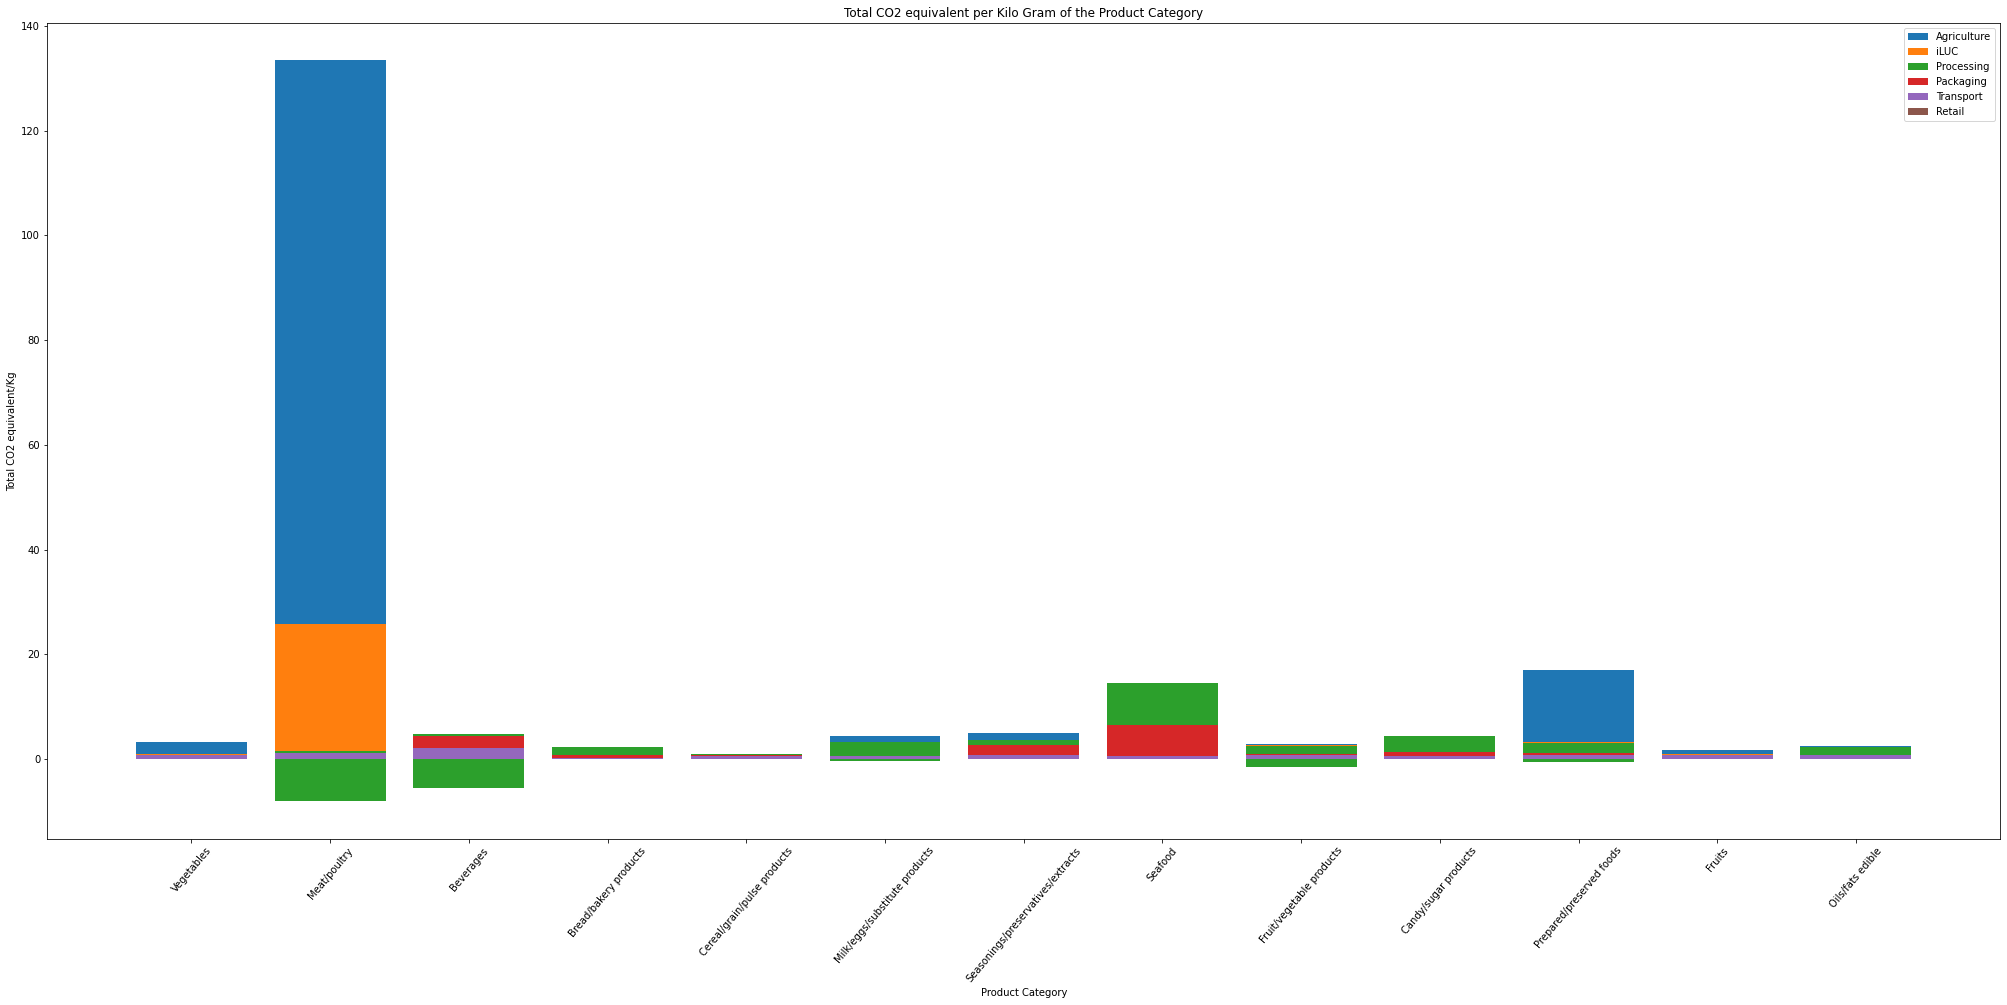

In [ ]:
# Stacked bar plot
fig, ax= plt.subplots(figsize=(35, 15))

ax.bar(selected_data["Category_en"], selected_data['Agriculture'], label= "Agriculture")
ax.bar(selected_data["Category_en"], selected_data['iLUC'], label='iLUC')
ax.bar(selected_data["Category_en"], selected_data['Processing'], label='Processing')
ax.bar(selected_data["Category_en"], selected_data['Packaging'], label='Packaging')
ax.bar(selected_data["Category_en"], selected_data['Transport'], label='Transport')
ax.bar(selected_data["Category_en"], selected_data['Retail'], label='Retail')

plt.xticks(rotation=50)
plt.title("Total CO2 equivalent per Kilo Gram of the Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total CO2 equivalent/Kg")
ax.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Total CO2 equivalent/Kg')

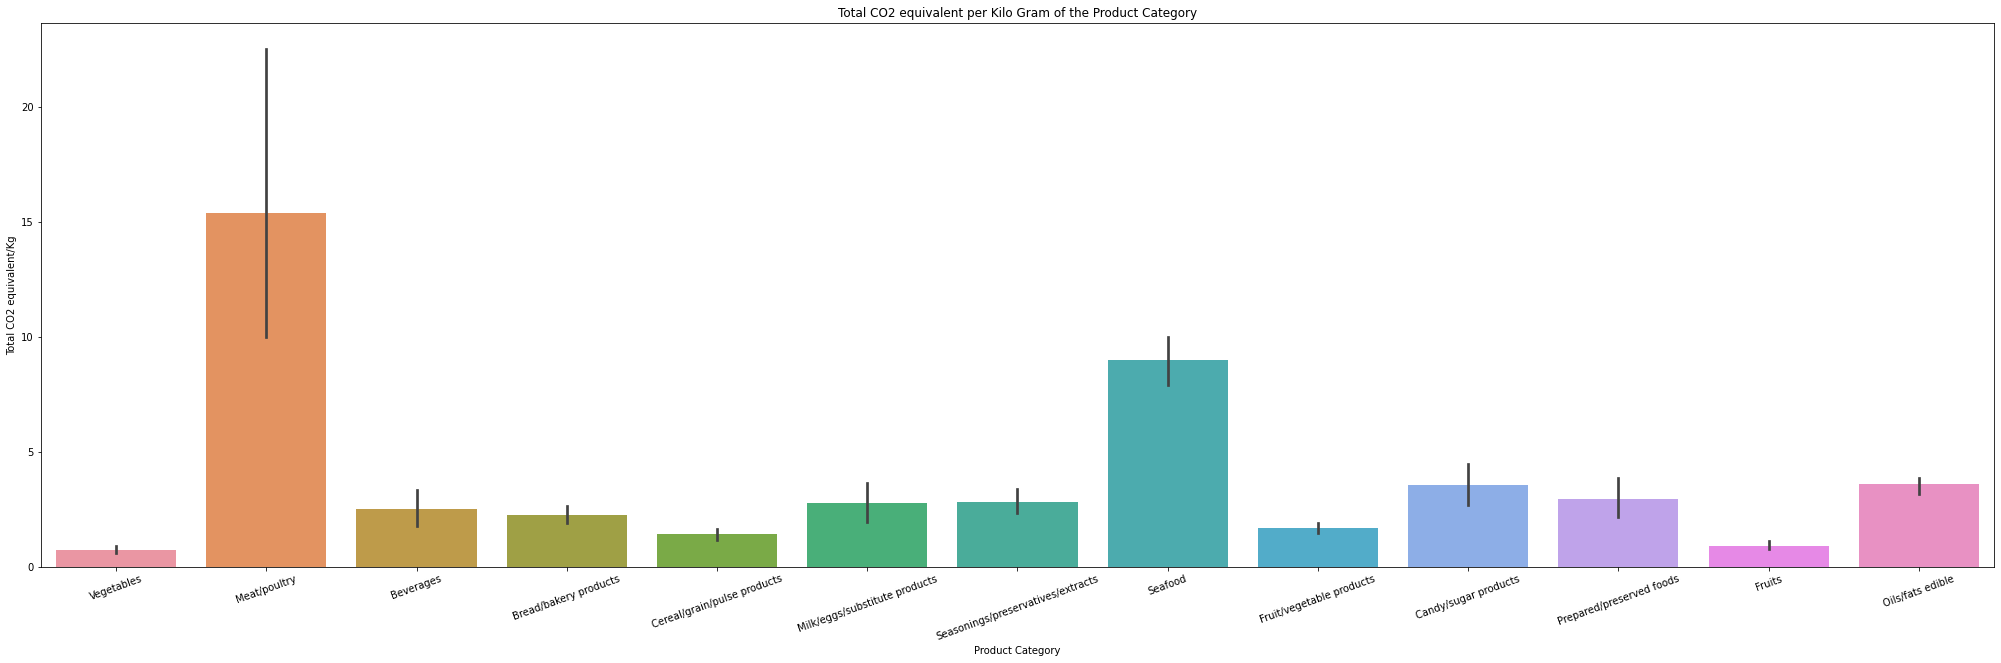

In [ ]:
# Bar chart
fig, ax= plt.subplots(figsize=(35, 10))
sns.barplot(selected_data["Category_en"], selected_data["Total_CO2_eq/kg"])
plt.xticks(rotation=20)
plt.title("Total CO2 equivalent per Kilo Gram of the Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total CO2 equivalent/Kg")

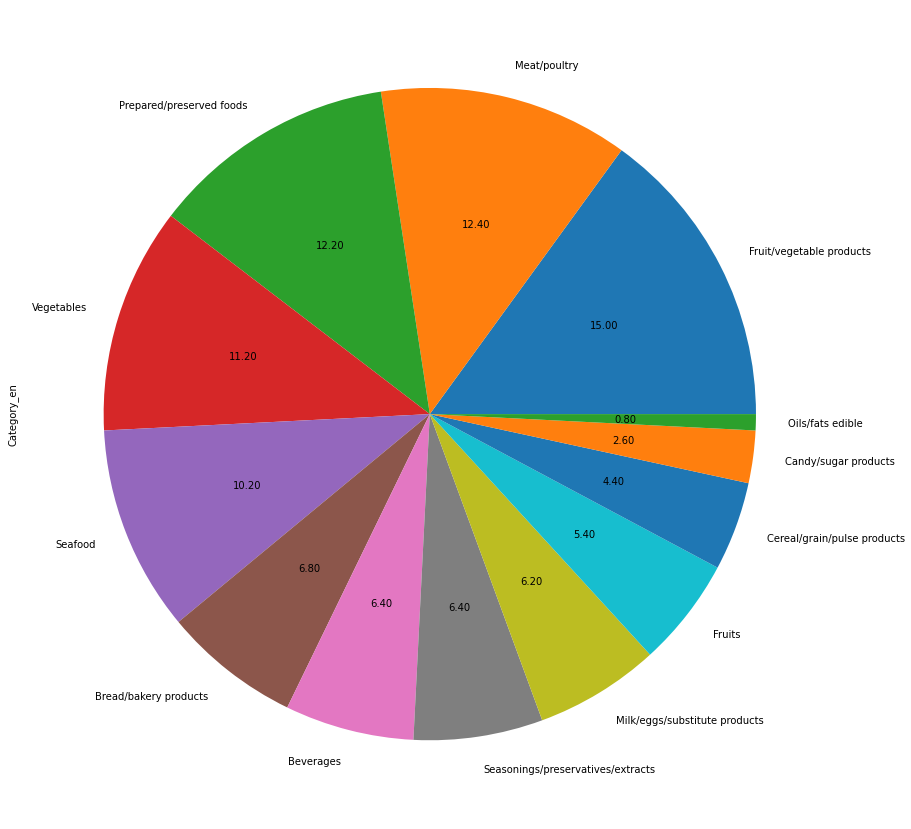

In [ ]:
# Pie chart
fig, ax= plt.subplots(figsize=(15, 15))
selected_data['Category_en'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()